# Model Selection

In the previous section we saw predictions are highly dependent on the chosen hyperparamters of the kernel. Therefore we need to define a strategy for model selection respectifly hyperparamter optimization. In the manner of baysian model selection we can define a hierarchal specification of models. At the lowest level are the parameter e.g. $\mathbf{w}$ like we derived in the weight-space view. This can be compared with the training of the parameter of neural network. At the second level are the hyperparameters $\theta$ which control the distribution of the parameters at the bottom level. For example the "batch-norm" constant of a given layer in a neural network, or ridge term $\lambda$ in ridge regression. At the top level we may have a set of possible model structures, $\mathcal{H_i}$ under consideration.

__First level inference__

$$
f(\mathbf{w}\mid\mathbf{y},X,\pmb\theta,\mathcal{H_i}) =
\frac{f(\mathbf{y}\mid X,\mathbf{w},\mathcal{H_i}) f(\mathbf{w}\mid\pmb\theta,\mathcal{H_i})}
{f(\mathbf{y}\mid X,\pmb\theta,\mathcal{H_i})}
$$

The distribution refer exactly to the derivations in the different space-views. $f(\mathbf{y}\mid X,\mathbf{w},\mathcal{H_i})$ defines the likelihood. In other words how good fits the data into the model. $f(\mathbf{w}\mid\theta,\mathcal{H_i})$ is our prior assumption and $f(\mathbf{y}\mid X,\theta,\mathcal{H_i})$ describes the marginal likelihood. The reulting posterior is a distribution of the parameter given the data and our model. The marginal likelihood is acting as normalizing constant and not depending on the posterior. We can get this constant by the integral below

$$
{f(\mathbf{y}\mid X,\pmb\theta,\mathcal{H_i})} = 
\int f(\mathbf{y}\mid X,\mathbf{w},\mathcal{H_i})f(\mathbf{w}\mid\pmb\theta,\mathcal{H_i})d\mathbf{w}
$$

__Second level inference__

At the next level, we analogously express the posterior over the hyperparameters, where the marginal likelihood from the first level plays the role of the likelihood

$$
f(\pmb\theta \mid\mathbf{y},X,\mathcal{H_i}) =
\frac{f(\mathbf{y}\mid X,\theta,\mathcal{H_i}) f(\pmb\theta\mid\mathcal{H_i})}
{f(\mathrm{y}\mid X,\mathcal{H_i})}
$$

where $f(\pmb\theta\mid\mathcal{H_i})$ is the hyper-prior (prior for the hyperparameters). The normalizing constant is given by

$$
f(\mathrm{y}\mid X,\mathcal{H_i})=\int f(\mathbf{y}\mid X,\theta,\mathcal{H_i}) f(\pmb\theta\mid\mathcal{H_i})d\pmb\theta
$$

__Third level inference__

At the top level, we compute the posterior for the model

$$
f(\mathcal{H_i} \mid \mathbf{y},X)=
\frac{f(\mathbf{y}\mid X,\mathcal{H_i})f(\mathcal{H_i})}
{f(\mathbf{y},X)}
$$

where

$$
f(\mathbf{y},X)= \sum_i f(\mathbf{y}\mid X,\mathcal{H_i})f(\mathcal{H_i})
$$

We note that the implementation of Baysian inference calls for the evaluation of several integrals. Depending of the models, these may  or may not be analytically tractable and in general one may have to resort analytiacal approximations or MCMC methods. In practice mostly the likelihood w.r.t the hypereparameters $\pmb\theta$ is used for model selection. This approximation is known as type II maximum Likelihood (ML-II). When looking for a optima one should be careful of overfitting, especially when there are many hyperparameters.

Generally we do not favour a model over another. Therefore the prior $f(\mathcal{H_i})$ can seen to be flat. Therefore $f(\mathcal{H_i} \mid \mathbf{y},X) \propto f(\mathrm{y}\mid X,\mathcal{H_i})$.
It is primarily the marginal likelihood $f(\mathbf{y}\mid X,\pmb\theta,\mathcal{H_i})$ involving the integral over the parameter space which distinguishes the Baysian scheme of inference from other schemes based optimization.

In the graph below we show the schematic of the behaviour of the marginal likelihood of data points of three model complexities. When we fix the data points $X$ we see the possible representation of our model to the targets $\mathbf{y}$ on the horizontal axis and the corresponding probability $f(\mathrm{y}\mid X,\mathcal{H_i})$. The complex model e.g. a neuronal net is capable to account a wider range as the simple model e.g. linear regression model. When making a point-estimate for a particular dataset indicated by the yellow line, the marginal likelihood prefers a model of intermediate complexity.

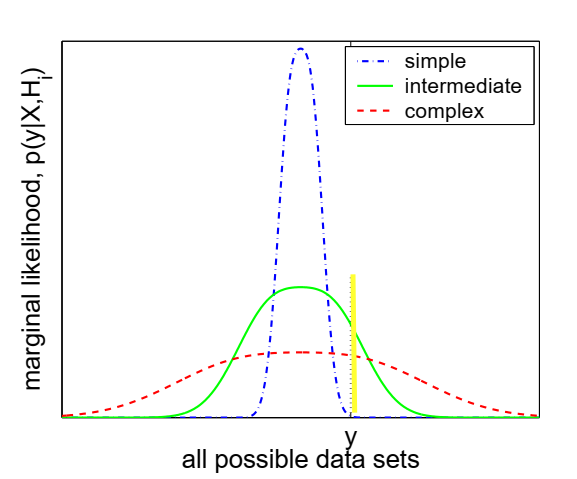

Notice that the trade-off between data-fit and model complexity is automatic; there is no need to set a parameter externally to fix the trade-off. Do not confuse
the automatic Occam’s razor principle with the use of priors in the Bayesian
method. Even if the priors are “flat” over complexity, the marginal likelihood
will still tend to favour the least complex model able to explain the data. Thus,
a model complexity which is well suited to the data can be selected using the
marginal likelihood.

__Question to Mirko__

When just optimizing ML-II this holds too?

We need to apply second level inference. How to apply first level inference we derived in the sections before. Therefore we need to optimize the marginal likelihood

$$
\log f(\mathbf{y} \mid X, \pmb\theta) = 
    -\frac{1}{2} \mathbf{y}^T
    \big(\mathbf{K} + \sigma_n^2\mathrm{I}\big)^{-1}
    \mathbf{y}
    -\frac{1}{2}\log|\mathbf{K}+\sigma_n^2\mathrm{I}|
    -\frac{n}{2}\log2\pi
$$

Where $\mathbf{K}$ is the covariance matrix, $\mathbf{y}$ our noisy target and $\sigma_n$ the noise itself. We write now explitly the marginal likelihood conditioned on the hyperparameters $\pmb\theta$. From this perspective it becomes clear why we call it the marginal likelihood, since it is obtained through marginalization over the latent function. 

The three terms of the marginal likelihood have readily interpretable roles: The only term involving our targets $\mathbf{y}$ is $-\frac{1}{2} \mathbf{y}^T\big(\mathbf{K} +\sigma_n^2\mathrm{I}\big)^{-1}\mathbf{y}$ which is the indicator for our data-fit. 

The complexitiy penalty is added by $-\frac{1}{2}\log|\mathbf{K}+\sigma_n^2\mathrm{I}|$ which is only depending on the covariance function. 

$-\frac{n}{2}\log2\pi$ is a constant.

For a differenct intuition for the penalty term we again review the GP predictive model. Increasing the values in the covariance matrix has the effect of higher correlation in the model. Increasing the size of training data has the effect of more constraints in the model and directly increases the shape of the $\mathbf{K}$ matrix. By the simple rules in linear algebra we see the effect of the penalty term

$$
A \in \mathbb{R}^{NxN}\\
\quad\\
\\
5^{N} * \det(A) = \det(5 * A)
$$

All hyperparameters which scales the values in the correlation matrix have a complexity effect. Also increasing the datapoints which increases the rank of $\mathbf{K}$ has an exponential effect.

In [16]:
import numpy as np

def exponential_cov(x1, x2, params, report_flag=False):
    x1 = np.array([x1]).reshape(-1)
    x2 = np.array([x2]).reshape(-1)
    sigma_f_ = params[0]
    l_ = params[1]
    if (report_flag):
        print("RBF Kernel with following parameter:")
        print("length scale: ",l_)
        print("sigma_f :", sigma_f_)   
    cov = sigma_f_**2 * np.exp( - 1. / (2.0 * l_**2) * np.subtract.outer(x1, x2)**2)

    return cov

In [17]:
def modified_log_marginallikelihood(X_,y_,covariance_function_,params_):
    K = covariance_function_(X_,X_,params_)
    L = np.linalg.cholesky(K + params_[2]**2* np.eye(K.shape[0])) # Line 2
    temp = np.linalg.lstsq(L,y_,rcond=-1)[0]
    alpha = np.linalg.lstsq(np.transpose(L),temp,rcond=-1)[0] # line 3
    data_fit_ = -0.5 * np.dot(y_.T,alpha)
    penalty_ = - np.sum(np.log(L.diagonal()))
    constant = - X_.shape[0]/2*np.log(2*np.pi) 
    m_lkhd_ = data_fit_ + penalty_ + constant
    return [m_lkhd_, data_fit_, penalty_]

In [18]:
# UNIT TEST log_marginallikelihood
modified_log_marginallikelihood(np.array([0.1,0.5,2]),
                                    np.array([1,3,6]),
                                    exponential_cov,
                                    [1.0,1.0,0.5])

[-18.63428338147493, -15.976105315302679, 0.09863753344176808]

In [19]:
np.random.seed(17)
x = (np.random.rand(20) * 2 - 1) * 5
x = x.reshape(-1,1)
cov = exponential_cov(x,x,[0.43,1.0,0.025])
# draw samples from the prior
L = np.linalg.cholesky(cov + 1e-6*np.eye(20))
y = np.dot(L, np.random.normal(size=(20,1))) 

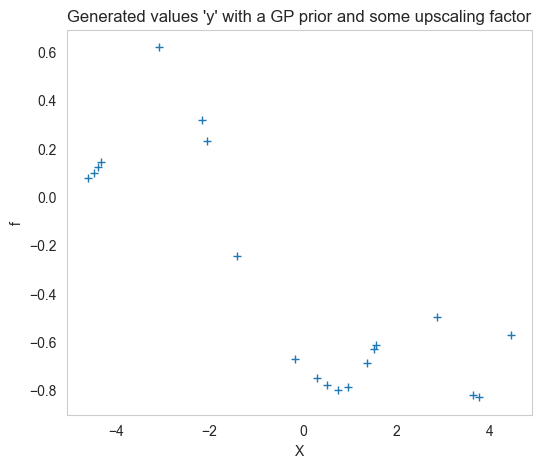

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 5))
ax.set_ylabel("f")
ax.set_xlabel("X")
ax.set_title("Generated values 'y' with a GP prior and some upscaling factor")
ax.grid()
ax.plot(x,y, '+')

In [21]:
length_scale_array = np.linspace(0.1,5.0,100)
marginal_likelihood_list = []
data_fit_list = []
penalty_term = []
for length_scale in length_scale_array:
    temp_list = (modified_log_marginallikelihood(x,y,exponential_cov,[1.0,length_scale,0.025]))
    marginal_likelihood_list.append(temp_list[0])
    data_fit_list.append(temp_list[1])
    penalty_term.append(temp_list[2])

[None, None, None]

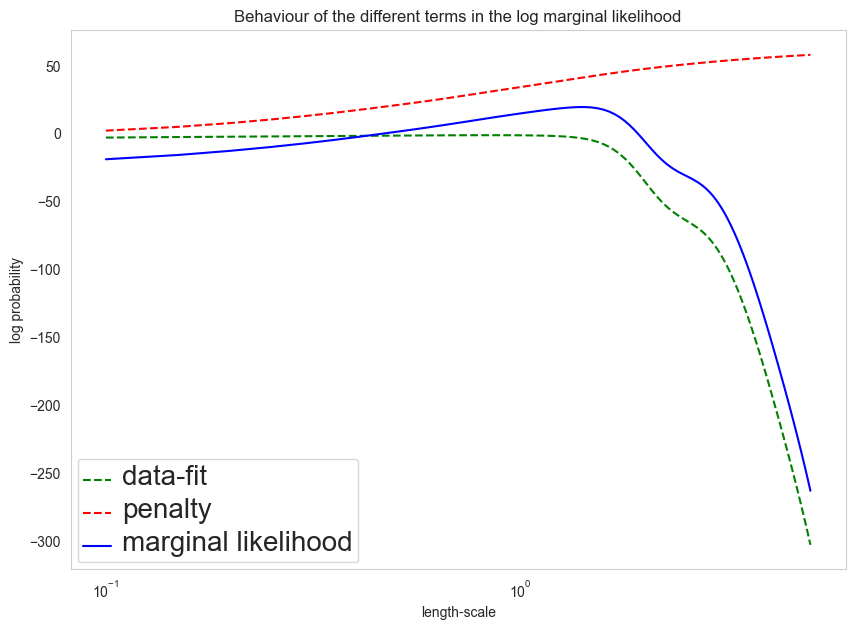

In [22]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_ylabel("log probability")
ax.set_xlabel("length-scale")
ax.set_title("Behaviour of the different terms in the log marginal likelihood")
ax.grid()
ax.plot(length_scale_array,np.array([data_fit_list]).reshape(-1,1), '--g',label='data-fit')
ax.plot(length_scale_array,np.array([penalty_term]).reshape(-1,1), '--r', label='penalty')
ax.plot(length_scale_array,np.array([marginal_likelihood_list]).reshape(-1,1),
        'b', label='marginal likelihood')
ax.set_xscale('log')
ax.legend(loc=3)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=20)

In a concrete example of fitting a GP with a squared exponential kernel the hyperparameters effect our model by the covariance function $\mathbf{K}$. We can make a contour plot to visualize the optimization problem.

In [23]:
def log_marginallikelihood(X_,y_,covariance_function_,params_):
    K = covariance_function_(X_,X_,params_)
    L = np.linalg.cholesky(K + params_[2]**2* np.eye(K.shape[0])) # Line 2
    temp = np.linalg.lstsq(L,y_,rcond=-1)[0]
    alpha = np.linalg.lstsq(np.transpose(L),temp,rcond=-1)[0] # line 3
    m_lkhd = -0.5 * np.dot(y_.T,alpha) - np.sum(np.log(L.diagonal())) - X_.shape[0]/2*np.log(2*np.pi) # line 7
    return m_lkhd

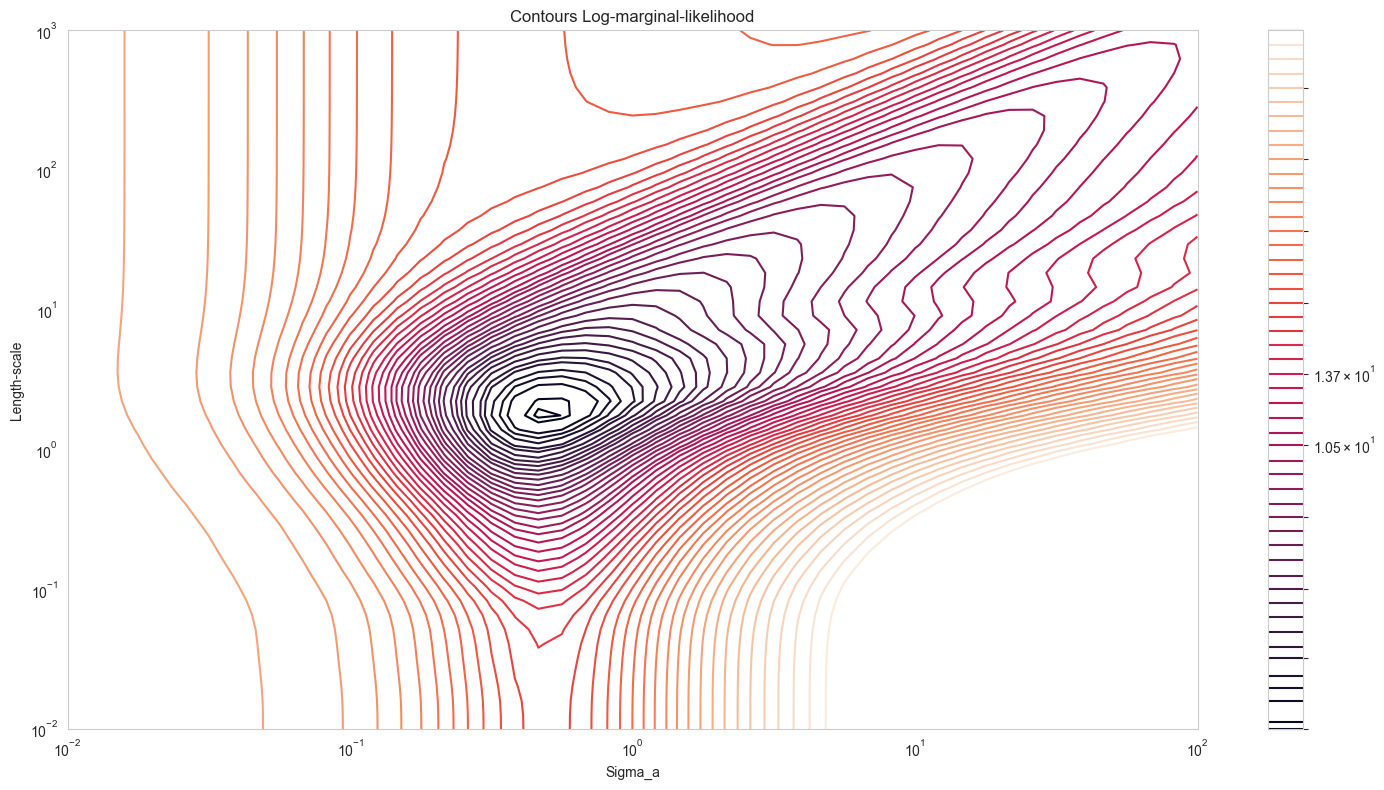

In [24]:
# Plot the Landscape of the marginal likelihood w.r.t. the two hyperparamters in the RBF Kernel
# Source-code: https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy.html
from matplotlib.colors import LogNorm
# Plot LML landscape
fig, ax = plt.subplots(figsize=(15, 8))

# from 0.01 to 1000, correspnds to sigma_a 
theta0 = np.logspace(-2, 2, 49)
# from 0.01 to 10, corresponds to length-scale
theta1 = np.logspace(-2, 3, 50)
Theta0, Theta1 = np.meshgrid(theta0, theta1)

LML = [[log_marginallikelihood(x,y,exponential_cov,[Theta0[i, j], Theta1[i, j], 0.3]) 
       for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T.reshape(50,49)

vmin, vmax = (-LML).min(), (-LML).max()
vmax = 50
level = np.around(np.logspace(np.log10(vmin), np.log10(vmax), 50), decimals=1)
h = ax.contour(Theta0, Theta1, -LML,
            levels=level, norm=LogNorm(vmin=vmin, vmax=vmax))
fig.colorbar(h)
ax.grid()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel("Length-scale")
ax.set_xlabel("Sigma_a")
ax.set_title("Contours Log-marginal-likelihood")

plt.tight_layout()
plt.show()


To find the a local optima we need the partial derivatives w.r.t. $\pmb\theta$. Then we can apply a searching algorithm like "gradient descent".

$$
\begin{equation}
\begin{split}
\frac{\partial}{\partial \theta_j} \log f(\mathbf{y}\mid X,\theta) &=
    \frac{\partial}{\partial \theta_j}
    \Big(
    -\frac{1}{2} \mathbf{y}^T K^{-1}\mathbf{y}
    -\frac{1}{2}\log|K|
    -\frac{n}{2}\log2\pi
    \Big)\\
    &= 
    \frac{1}{2} \mathbf{y}^T K^{-1}\frac{\partial K}{\partial \theta_j} K^{-1} \mathbf{y}
    -\frac{1}{2} \text{tr}\big(K^{-1} \frac{\partial K}{\partial \theta_j} \big)\\
    &=
    \frac{1}{2}\text{tr}\bigg(\big(\alpha\alpha^T-K^{1}\big) \frac{\partial K}{\partial \theta_j} \bigg)
\end{split}
\end{equation}
$$

where $\alpha=K^{-1}\mathbf{y}$

The complexity of computing the marginal likelihood is dominated by the need to invert the $K$ matrix. The partial derivative of $K$ w.r.t. $\theta_j$ is depending on the chosen kernel.

In the optimization of the maximum log marginal likelihood need to be considered that most of the distributions are not convex and therefore there are several local optima and minima. Like in the example below the contour shows two local optima. An optimal GP can be described with a higher noise $\sigma_n$ and a higher length-scale $l$ or decrease both. Both solutions are reasonable in the way of optimization. Via additional domain knowledge the appropriate model has to be chosen. 

In [25]:
x = np.array([-5.5,-2.5,-1,-0.9,1,5.5,6])
y = np.array([0.1,0,1.1,1.5,0.5,1.9,1.8])

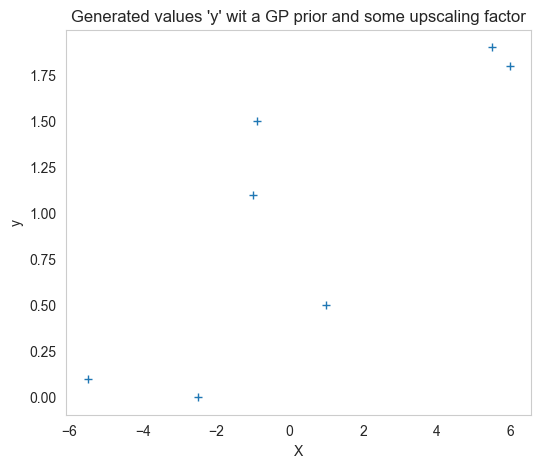

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 5))
ax.set_ylabel("y")
ax.set_xlabel("X")
ax.set_title("Generated values 'y' wit a GP prior and some upscaling factor")
ax.grid()
ax.plot(x,y, '+')

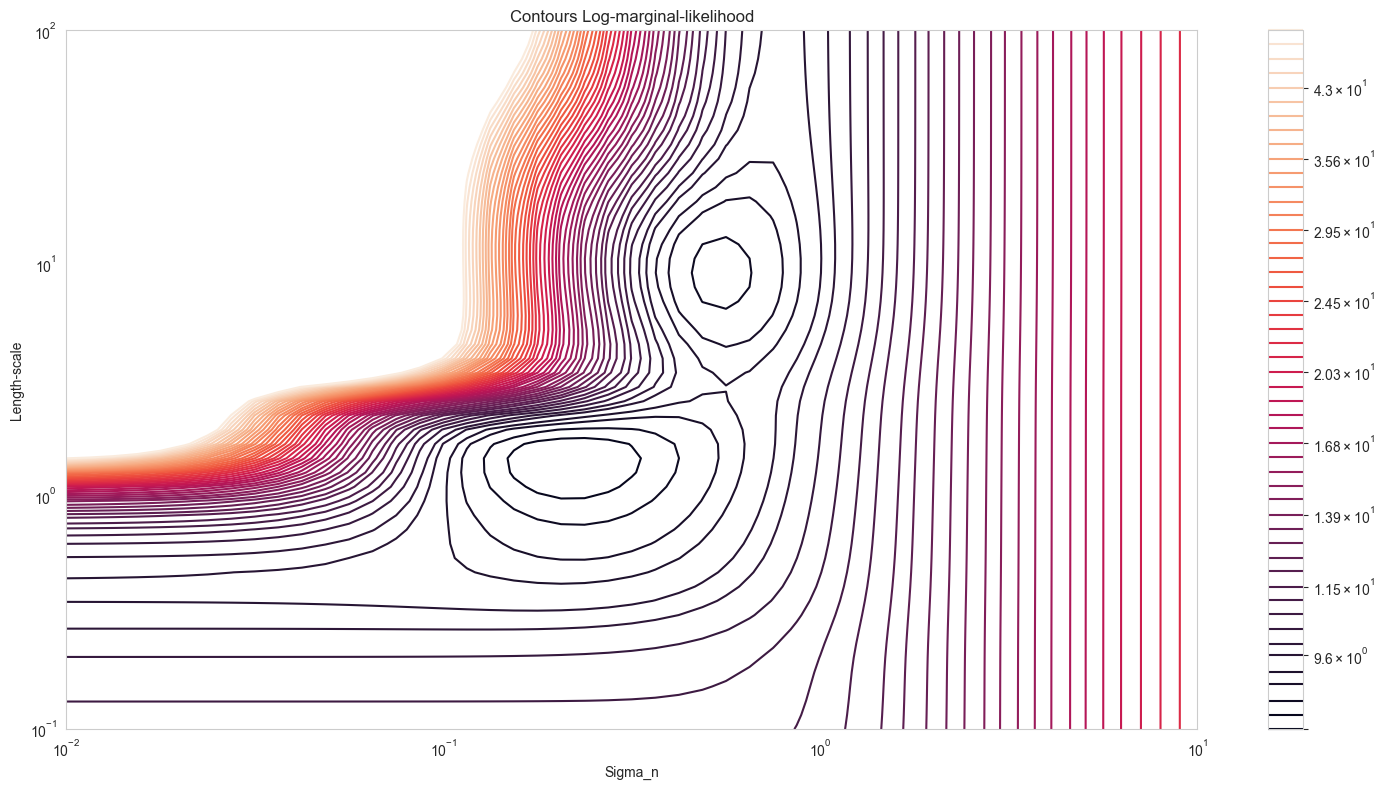

In [27]:
# Plot the Landscape of the marginal likelihood w.r.t. the two hyperparamters in the RBF Kernel
# Source-code: https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy.html
from matplotlib.colors import LogNorm
# Plot LML landscape
fig, ax = plt.subplots(figsize=(15, 8))

# from 0.01 to 1000, correspnds to sigma_n 
theta0 = np.logspace(-2, 1, 49)
# from 0.01 to 10, corresponds to length-scale
theta1 = np.logspace(-1, 2, 50)
Theta0, Theta1 = np.meshgrid(theta0, theta1)

LML = [[log_marginallikelihood(x,y,exponential_cov,[1.0,Theta1[i, j], Theta0[i, j]]) 
       for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T.reshape(50,49)

vmin, vmax = (-LML).min(), (-LML).max()
vmax = 50
level = np.around(np.logspace(np.log10(vmin), np.log10(vmax), 50), decimals=1)
h = ax.contour(Theta0, Theta1, -LML,
            levels=level, norm=LogNorm(vmin=vmin, vmax=vmax))
fig.colorbar(h)
ax.grid()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel("Length-scale")
ax.set_xlabel("Sigma_n")
ax.set_title("Contours Log-marginal-likelihood")

plt.tight_layout()
plt.show()

In [28]:
import numpy as np
np.random.seed(17)
x = (np.random.rand(4) * 2 - 1) * 5
cov = exponential_cov(x,x,[0.43,1.0,0.025])
# draw samples from the prior
L = np.linalg.cholesky(cov + 1e-6 * np.eye(4))
y = np.dot(L, np.random.normal(size=(4,1))) * 2
X_star = np.linspace(-10,10,100)

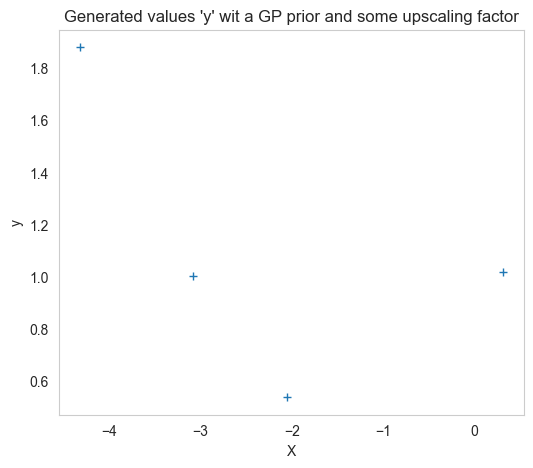

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 5))
ax.set_ylabel("y")
ax.set_xlabel("X")
ax.set_title("Generated values 'y' wit a GP prior and some upscaling factor")
ax.grid()
ax.plot(x,y, '+')

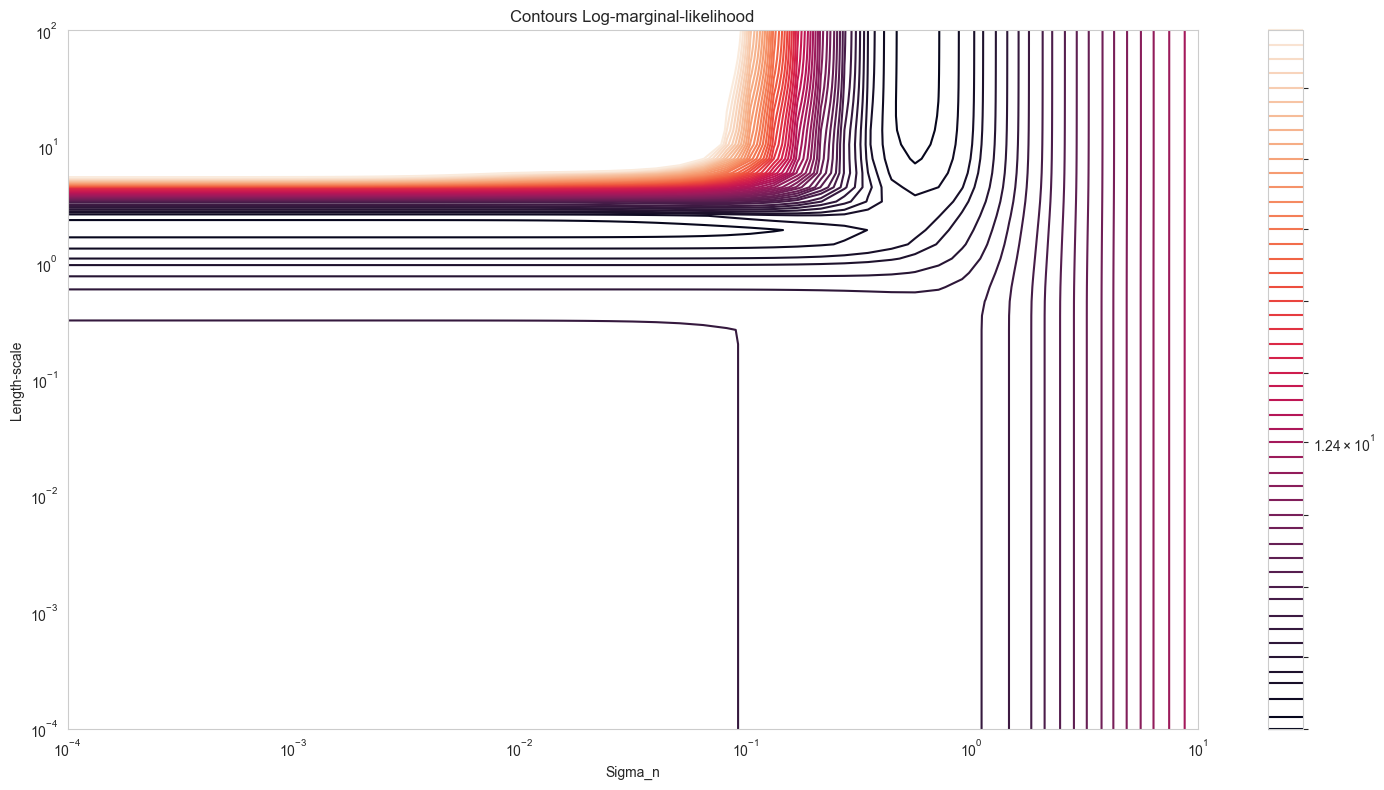

In [30]:
# Plot the Landscape of the marginal likelihood w.r.t. the two hyperparamters in the RBF Kernel
# Source-code: https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy.html
from matplotlib.colors import LogNorm
# Plot LML landscape
fig, ax = plt.subplots(figsize=(15, 8))

# from 0.01 to 1000, correspnds to sigma_n 
theta0 = np.logspace(-4, 1, 49)
# from 0.01 to 10, corresponds to length-scale
theta1 = np.logspace(-4, 2, 50)
Theta0, Theta1 = np.meshgrid(theta0, theta1)

LML = [[log_marginallikelihood(x,y,exponential_cov,[1.0,Theta1[i, j], Theta0[i, j]]) 
       for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T.reshape(50,49)

vmin, vmax = (-LML).min(), (-LML).max()
vmax = 50
level = np.around(np.logspace(np.log10(vmin), np.log10(vmax), 50), decimals=1)
h = ax.contour(Theta0, Theta1, -LML,
            levels=level, norm=LogNorm(vmin=vmin, vmax=vmax))
fig.colorbar(h)
ax.grid()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel("Length-scale")
ax.set_xlabel("Sigma_n")
ax.set_title("Contours Log-marginal-likelihood")

plt.tight_layout()
plt.show()